In [1]:
import pandas as pd

# Load cleaned dataset
cleaned_path = "../data/AAPL_cleaned.csv"
df = pd.read_csv(cleaned_path)

# Prophet requires specific column names
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet.head()


,ds,y
0,2015-02-13,28.311186
1,2015-02-17,28.478270
2,2015-02-18,28.676550
3,2015-02-19,28.616396
4,2015-02-20,28.850323


In [2]:
from prophet import Prophet

# Initialize model
model = Prophet(daily_seasonality=True)

# Fit model
model.fit(df_prophet)

# Create future dataframe for next 365 days
future = model.make_future_dataframe(periods=365)

# Predict
forecast = model.predict(future)

# Preview forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


d:\stock-forecasting\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:22:31 - cmdstanpy - INFO - Chain [1] start processing
21:22:32 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2847,2025-12-27,274.619257,259.230242,291.522342
2848,2025-12-28,274.490914,257.099155,291.463321
2849,2025-12-29,274.960914,259.142530,291.811112
2850,2025-12-30,274.761816,259.011459,292.569468
2851,2025-12-31,274.535149,257.697518,291.761785


In [4]:
from prophet.plot import plot_plotly, plot_components_plotly
import os

# -------------------------------
# Ensure root-level images folder exists
# -------------------------------
if not os.path.exists("../images"):
    os.makedirs("../images")

# Interactive forecast plot
fig1 = plot_plotly(model, forecast)
fig1.write_image("../images/prophet_forecast_interactive.png")  # Save interactive plot as static image
fig1.show()

# Plot trend, weekly, and yearly components
fig2 = plot_components_plotly(model, forecast)
fig2.write_image("../images/prophet_components.png")
fig2.show()


d:\stock-forecasting\.venv\Lib\site-packages\plotly\io\_json.py:558: UserWarning:

Discarding nonzero nanoseconds in conversion.



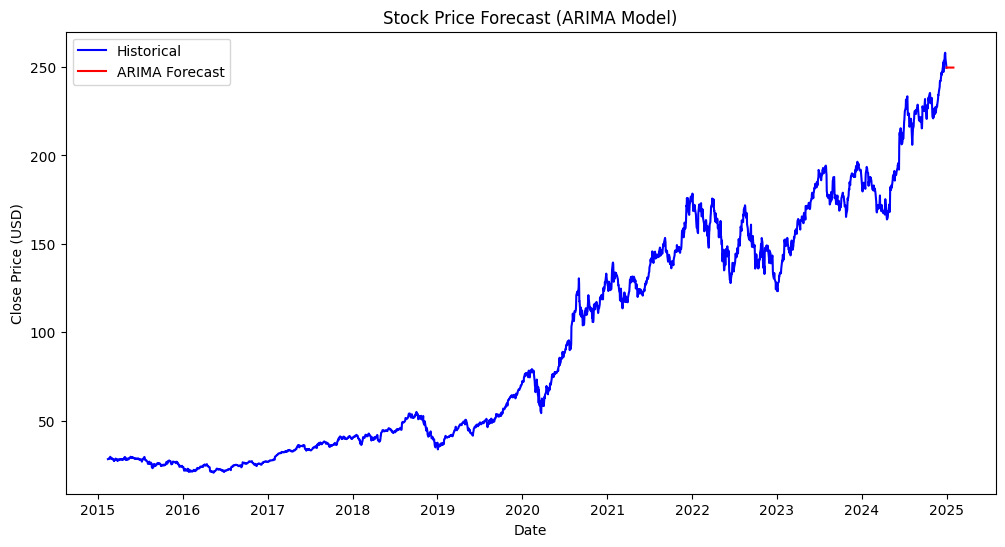

In [5]:
# Step 4.2 – ARIMA Forecasting 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import os

# Ensure root-level images folder exists
if not os.path.exists("../images"):
    os.makedirs("../images")

# Ensure Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fit ARIMA model
model_arima = ARIMA(df['Close'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast next 30 days
forecast_arima = model_arima_fit.forecast(steps=30)

# Create corresponding future dates
last_date = df['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Plot historical + forecast
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Historical', color='blue')
plt.plot(future_dates, forecast_arima, label='ARIMA Forecast', color='red')
plt.title("Stock Price Forecast (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.savefig("../images/arima_forecast.png", dpi=300)  # Save image
plt.show()


In [6]:
# Step 4.3 – Prophet Forecasting (Clean & Ready)

import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt
import os

# Ensure root-level images folder exists
if not os.path.exists("../images"):
    os.makedirs("../images")

# Load cleaned dataset
cleaned_path = "../data/AAPL_cleaned.csv"
df = pd.read_csv(cleaned_path)

# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Prepare data for Prophet
df_prophet = df[['Date', 'Close']].rename(columns={'Date':'ds', 'Close':'y'})

# Convert y to numeric and drop missing values
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')
df_prophet = df_prophet.dropna()

# Initialize Prophet model
model_prophet = Prophet(daily_seasonality=True)

# Fit the model
model_prophet.fit(df_prophet)

# Create future dataframe for 1-year forecast
future = model_prophet.make_future_dataframe(periods=365)

# Predict future prices
forecast = model_prophet.predict(future)

# -------------------
# Plotting Forecast
# -------------------

# Interactive forecast plot
fig1 = plot_plotly(model_prophet, forecast)
fig1.write_image("../images/prophet_forecast_interactive.png")
fig1.show() 

# Plot trend, weekly, and yearly components
fig2 = plot_components_plotly(model_prophet, forecast)
fig2.write_image("../images/prophet_components.png")
fig2.show()


DEBUG	cmdstanpy:command.py:do_command()- cmd: where.exe tbb.dll
cwd: None


DEBUG	cmdstanpy:model.py:__init__()- TBB already found in load path
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\balam\AppData\Local\Temp\tmp0x7qv6qs\_v4a5fch.json
DEBUG	cmdstanpy:filesystem.py:_temp_single_json()- input tempfile: C:\Users\balam\AppData\Local\Temp\tmp0x7qv6qs\5cktb6bl.json
DEBUG	cmdstanpy:model.py:_run_cmdstan()- idx 0
DEBUG	cmdstanpy:model.py:_run_cmdstan()- running CmdStan, num_threads: None
DEBUG	cmdstanpy:model.py:_run_cmdstan()- CmdStan args: ['D:\\stock-forecasting\\.venv\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=20113', 'data', 'file=C:\\Users\\balam\\AppData\\Local\\Temp\\tmp0x7qv6qs\\_v4a5fch.json', 'init=C:\\Users\\balam\\AppData\\Local\\Temp\\tmp0x7qv6qs\\5cktb6bl.json', 'output', 'file=C:\\Users\\balam\\AppData\\Local\\Temp\\tmp0x7qv6qs\\prophet_modelmt9hx6qn\\prophet_model-20251005212500.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:25:00 - cmdstanpy - INFO - Chain [1] start 

d:\stock-forecasting\.venv\Lib\site-packages\plotly\io\_json.py:558: UserWarning:

Discarding nonzero nanoseconds in conversion.

